<a href="https://colab.research.google.com/github/mjkm97/03.-ML-Model-Time-Series-Sales-Prediction/blob/main/ML_Project_(2)Corr%2C_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터로드

In [5]:
# 데이터 경로 지정 및 읽어오기
import pandas as pd
data_path = '/content/train_store.csv'

# Define your column names as a list

custom_column_names = ['Store',
                       'DayOfWeek',
                       'Date',
                       'Year',
                       'Month',
                       'Day',
                       'Sales',
                       'Customers',
                       'Open',
                       'Promo',
                       'StateHoliday',
                       'SchoolHoliday',
                       'StoreType',
                       'Assortment'	,
                       'CompetitionDistance',
                       'CompetitionOpenSinceMonth',
                       'CompetitionOpenSinceYear',
                       'Promo2',
                       'Promo2SinceWeek',
                       'Promo2SinceYear',
                       'PromoInterval']

# Load the CSV with custom column names
df = pd.read_csv(data_path, header=0, names=custom_column_names)

# Print the column names
print(df.columns)


<ipython-input-5-d04c256ecbd8>:30: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, header=0, names=custom_column_names)


Index(['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Day', 'Sales',
       'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [6]:
df.head()

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015.7.31,2015,7,31,5263,555,1,1,...,1,c,a,1270,9,2008,0,0,0,0
1,2,5,2015.7.31,2015,7,31,6064,625,1,1,...,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015.7.31,2015,7,31,8314,821,1,1,...,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015.7.31,2015,7,31,13995,1498,1,1,...,1,c,c,620,9,2009,0,0,0,0
4,5,5,2015.7.31,2015,7,31,4822,559,1,1,...,1,a,a,29910,4,2015,0,0,0,0


In [7]:
import numpy as np

seed = 1234
np.random.seed(seed)

In [8]:
df[['Store', 'Open','CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth','CompetitionDistance']].head() # Enclose column names in a list

,Store,Open,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionDistance
0,1,1,2008,9,1270
1,2,1,2007,11,570
2,3,1,2006,12,14130
3,4,1,2009,9,620
4,5,1,2015,4,29910


In [9]:

df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Year,0
Month,0
Day,0
Sales,0
Customers,0
Open,0
Promo,0


In [10]:
import numpy as np

seed = 1234
np.random.seed(seed)

In [11]:
df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1}).fillna(0).astype(int)


print(df['StoreType'].unique())
print(df['Assortment'].unique())
print(df['StateHoliday'].unique())
print(df['SchoolHoliday'].unique())
print(df['DayOfWeek'].unique())
print(df['Month'].unique())
print(df['Promo'].unique())
print(df['Promo2'].unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
[0 1]
[1 0]
[5 4 3 2 1 7 6]
[ 7  6  5  4  3  2  1 12 11 10  9  8]
[1 0]
[0 1]


<ipython-input-11-536ea20e8566>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1}).fillna(0).astype(int)


In [12]:
print(df['StateHoliday'].isna().sum())  # NaN 개수 확인
print(df['StateHoliday'].unique())

0
[0 1]


In [13]:
df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Year,int64
Month,int64
Day,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64


### 상관관계 분석


Cramér's V는 범주형 변수 간의 상관관계를 측정하는 지표

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats

def cramers_v(x, y):
    """Cramér's V 계산 함수"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramers_v_matrix(df, categorical_columns):
    """Cramér's V 상관 행렬 계산 함수"""
    corr_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                               index=categorical_columns, columns=categorical_columns)

    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0
            else:
                corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

    return corr_matrix.astype(float)

# 예제 실행
categorical_cols = ['StoreType', 'Assortment', 'StateHoliday', 'SchoolHoliday']
corr_matrix = cramers_v_matrix(df, categorical_cols)
print(corr_matrix)


               StoreType  Assortment  StateHoliday  SchoolHoliday
StoreType       1.000000    0.537412      0.003151       0.001790
Assortment      0.537412    1.000000      0.002427       0.002196
StateHoliday    0.003151    0.002427      1.000000       0.148640
SchoolHoliday   0.001790    0.002196      0.148640       1.000000


###PairPlot해석###

1. 색상 코딩: 점들은 상점 유형(a, b, c, d)에 따라 색상이 다르게 표시되어 있어, 각 상점 유형별 특성을 비교

2. 그래프 특징:

* 대각선 플롯: 각 변수의 분포
* 대각선 외 플롯: 변수들 간의 상관관계를 산점도로 시각화

**주요 인사이트**
* 매출은 상점 유형에 따라 큰 차이를 보입니다.
* 프로모션은 이산적인(discrete) 분포를 가집니다.
* 경쟁사 거리는 상점 유형에 따라 흥미로운 변화를 보입니다.
* 변수들 사이에 일부 상관관계가 존재하지만, 즉각적으로 명확하지는 않습니다.

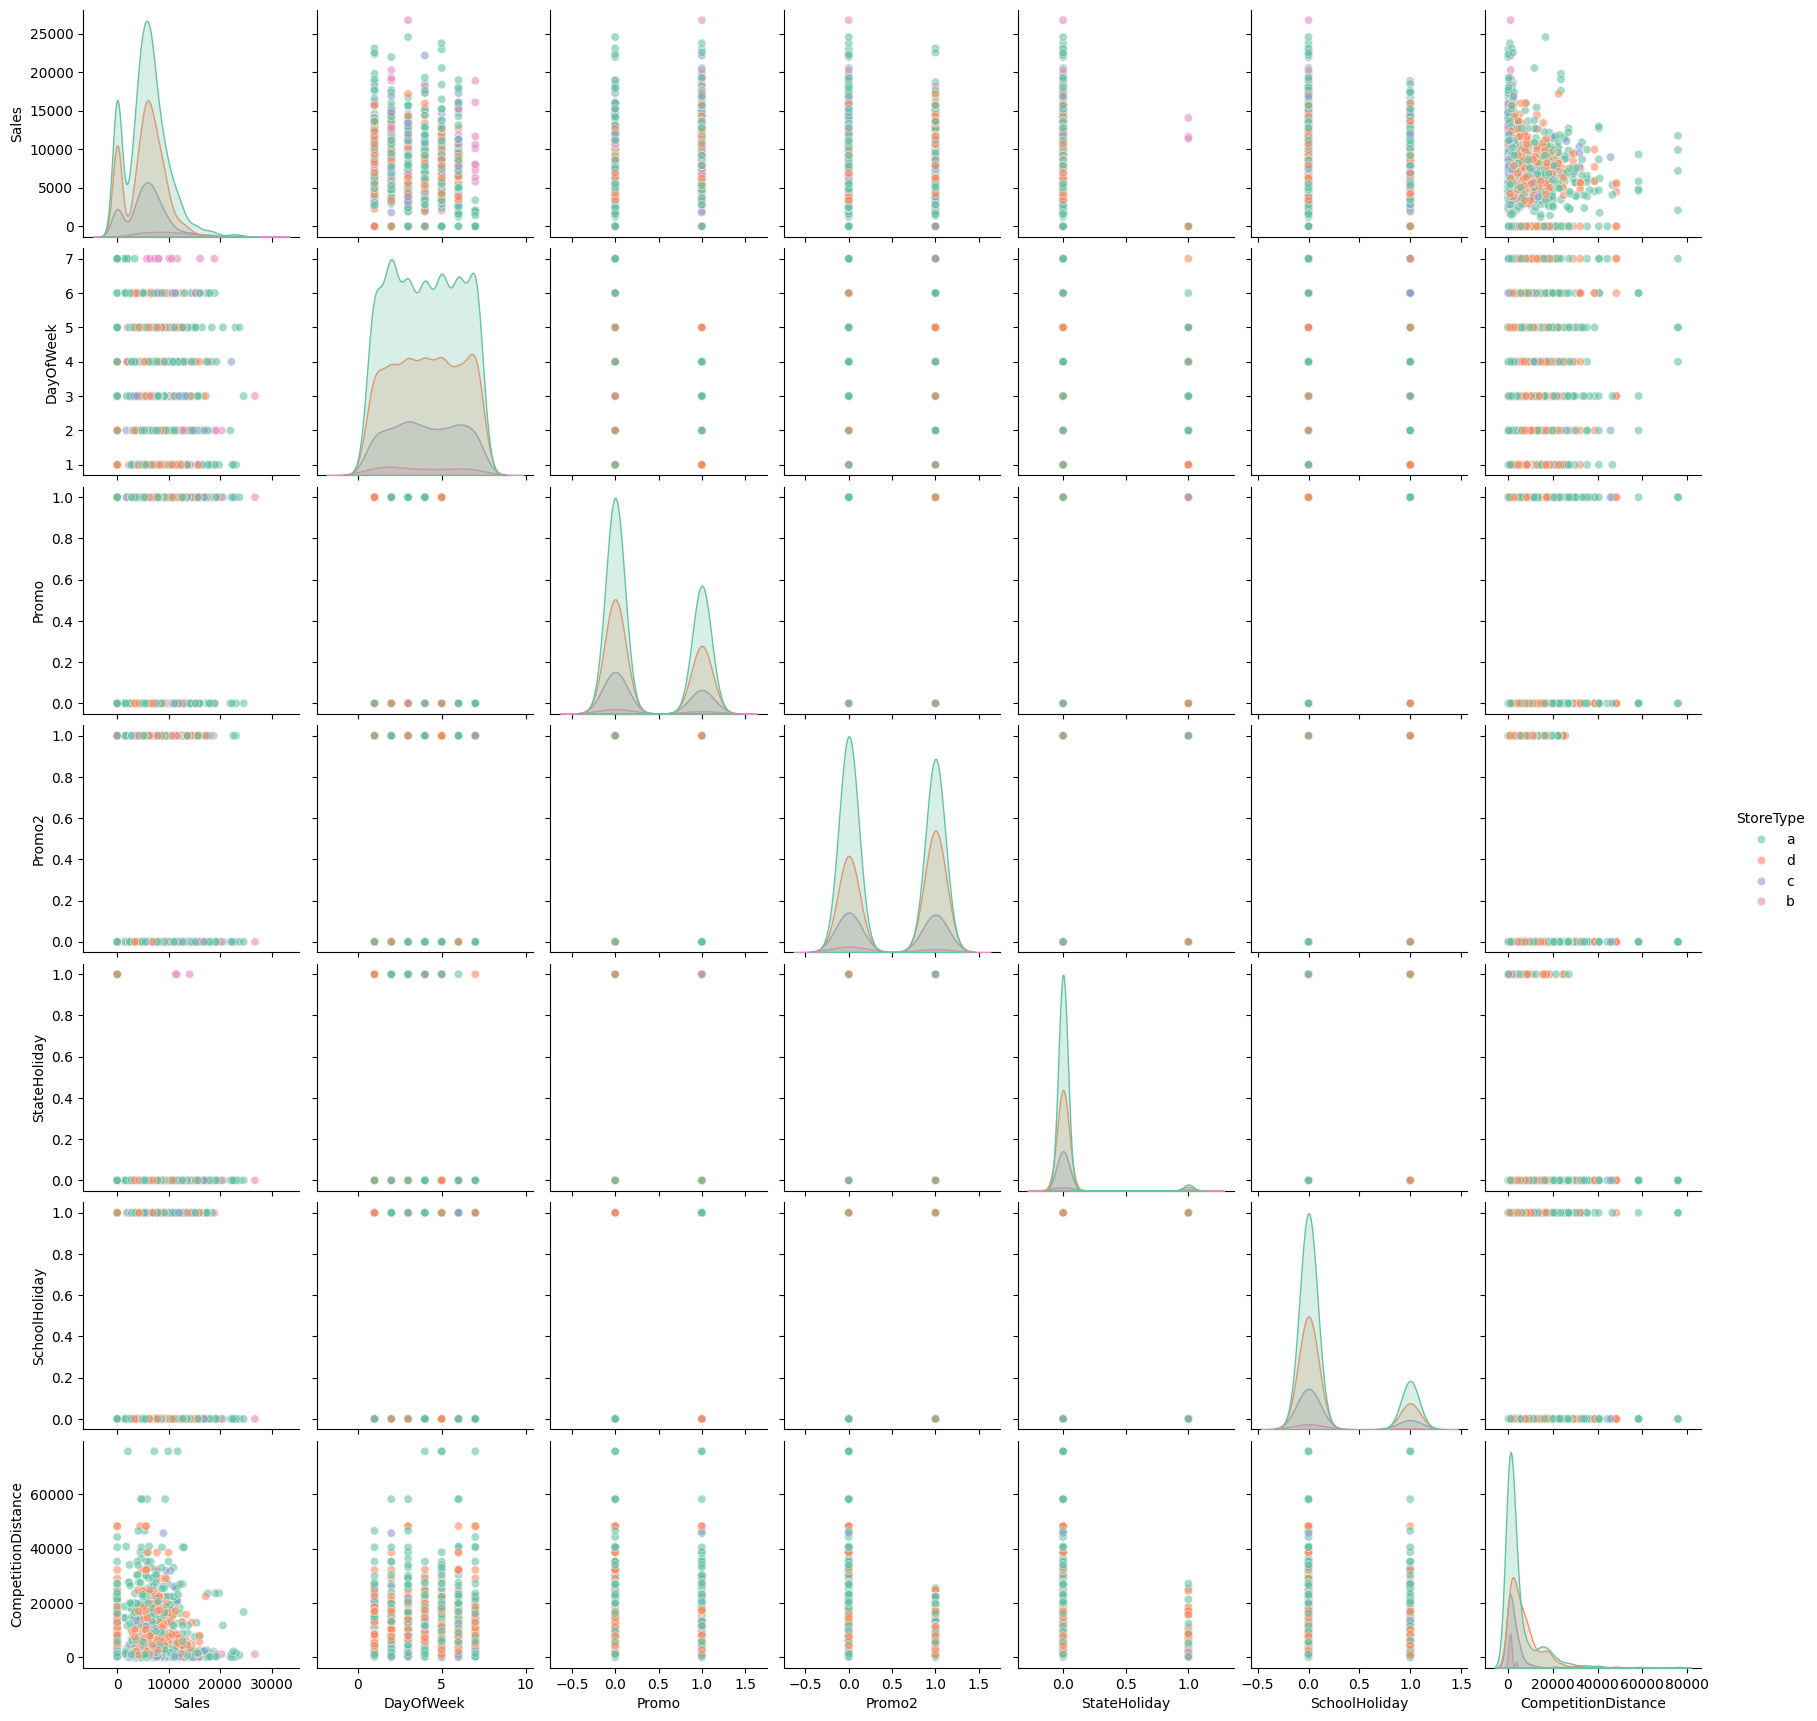

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# 'Sales'와 상관관계가 있는 변수들만 추출해서 사용
features = [
    'Sales', 'DayOfWeek', 'Promo', 'Promo2', 'StateHoliday',
    'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance'
]
df_sample = df[features].sample(n=3000, random_state=42)  # 3,000개 샘플 선택

sns.pairplot(df_sample, hue='StoreType', palette='Set2', plot_kws={'alpha': 0.6})


# 그래프 표시
plt.show()


In [17]:
# 연속형 변수들만 선택
continuous_features = ['Sales', 'CompetitionDistance']

# 상관계수 계산
corr_matrix = df[continuous_features].corr()

# 상관계수 출력
print(corr_matrix)

# 상관관계 값 프린트
print('#'*20, '상관관계 값 확인', '#'*20)
print(corr_matrix)

                        Sales  CompetitionDistance
Sales                1.000000            -0.018869
CompetitionDistance -0.018869             1.000000
#################### 상관관계 값 확인 ####################
                        Sales  CompetitionDistance
Sales                1.000000            -0.018869
CompetitionDistance -0.018869             1.000000


**ANOVA**

Promo, StoreType, Assortment, StateHoliday, DayofWeek, Month, Weekend vs Weekday와 같은 변수들은 매출에 유의미한 영향을 미칩니다.

SchoolHoliday는 매출에 큰 영향을 주지 않는다고 할 수 있습니다.

대부분의 변수에서 p-value가 0.0으로 매우 낮아서, 해당 변수들이 매출에 유의미한 영향을 미친다는 결론을 내릴 수 있습니다. [p-value <0.05]

[F-statistic]:
F-statistic 값이 클수록 그룹 간 차이가 크다는 의미로, 해당 변수가 매출에 영향을 미친다고 해석할 수 있습니다.

F-statistic 값과 p-value를 함께 고려하여, 변수들이 매출에 유의미한 영향을 미치는지 여부를 결정할 수 있습니다.

In [18]:
import scipy.stats as stats

# 1. Promo와 매출 (Sales)의 관계
promo_sales = df.groupby('Promo')['Sales']
f_statistic, p_value = stats.f_oneway(promo_sales.get_group(0), promo_sales.get_group(1))
print(f"ANOVA (Promo) - F-statistic: {f_statistic}, p-value: {p_value}")

# 2. StoreType과 매출 (Sales)의 관계
storetype_sales = df.groupby('StoreType')['Sales']
f_statistic, p_value = stats.f_oneway(storetype_sales.get_group('a'),
                                      storetype_sales.get_group('b'),
                                      storetype_sales.get_group('c'),
                                      storetype_sales.get_group('d'))
print(f"ANOVA (StoreType) - F-statistic: {f_statistic}, p-value: {p_value}")

# 3. Assortment와 매출 (Sales)의 관계
assortment_sales = df.groupby('Assortment')['Sales']
f_statistic, p_value = stats.f_oneway(assortment_sales.get_group('a'),
                                      assortment_sales.get_group('b'),
                                      assortment_sales.get_group('c'))
print(f"ANOVA (Assortment) - F-statistic: {f_statistic}, p-value: {p_value}")

#4. 방학과 휴일 매출과의 관계

#방학
school_sales = df.groupby('SchoolHoliday')['Sales']
f_statistic, p_value = stats.f_oneway(school_sales.get_group(0), school_sales.get_group(1))
print(f"ANOVA (SchoolHoliday) - F-statistic: {f_statistic}, p-value: {p_value}")

#매출

stateholiday_sales = df.groupby('StateHoliday')['Sales']
f_statistic, p_value = stats.f_oneway(stateholiday_sales.get_group(0), stateholiday_sales.get_group(1))
print(f"ANOVA (StateHoliday) - F-statistic: {f_statistic}, p-value: {p_value}")

# DayOfWeek와 매출 관계 분석
dow_sales = df.groupby('DayOfWeek')['Sales']
# 각 그룹에 데이터가 있는지 확인한 후, 값이 있는 그룹들만 ANOVA
dow_groups = [dow_sales.get_group(i) for i in range(1, 8) if i in dow_sales.groups]
if len(dow_groups) > 1:  # 최소 2개 이상의 그룹이 있어야 ANOVA를 진행할 수 있습니다
    f_statistic, p_value = stats.f_oneway(*dow_groups)
    print(f"ANOVA (DayofWeek) - F-statistic: {f_statistic}, p-value: {p_value}")
else:
    print("DayOfWeek에서 유효한 그룹이 없습니다.")

# Month와 매출 관계 분석
month_sales = df.groupby('Month')['Sales']
# 각 그룹에 데이터가 있는지 확인하고, 값이 있는 그룹만 사용
month_groups = [month_sales.get_group(i) for i in range(1, 13) if i in month_sales.groups]
if len(month_groups) > 1:
    f_statistic, p_value = stats.f_oneway(*month_groups)
    print(f"ANOVA (Month) - F-statistic: {f_statistic}, p-value: {p_value}")
else:
    print("Month에서 유효한 그룹이 없습니다.")

# 주말(6, 7)과 평일(1~5) 구분
dow_sales_weekend = df[df['DayOfWeek'].isin([6, 7])]['Sales']
dow_sales_weekday = df[df['DayOfWeek'].isin([1, 2, 3, 4, 5])]['Sales']

f_statistic, p_value = stats.f_oneway(dow_sales_weekend, dow_sales_weekday)
print(f"ANOVA (Weekend vs Weekday) - F-statistic: {f_statistic}, p-value: {p_value}")


ANOVA (Promo) - F-statistic: 261680.52425305304, p-value: 0.0
ANOVA (StoreType) - F-statistic: 6817.192011836288, p-value: 0.0
ANOVA (Assortment) - F-statistic: 5057.065754982005, p-value: 0.0
ANOVA (SchoolHoliday) - F-statistic: 7424.584760670561, p-value: 0.0
ANOVA (StateHoliday) - F-statistic: 70279.56493497977, p-value: 0.0
ANOVA (DayofWeek) - F-statistic: 99160.82997545716, p-value: 0.0
ANOVA (Month) - F-statistic: 670.8578278840125, p-value: 0.0
ANOVA (Weekend vs Weekday) - F-statistic: 258506.99312187874, p-value: 0.0
